In [23]:
 #import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from bioinfokit.analys import stat

In [24]:
 # load the A4 dataframe
df = pd.read_csv('INF2178_A4_data.csv')
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [25]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [26]:
 # Initial descriptive statistics for the continuous variables
descriptive_stats = df.describe()
descriptive_stats

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,190.421769,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,371.000000,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


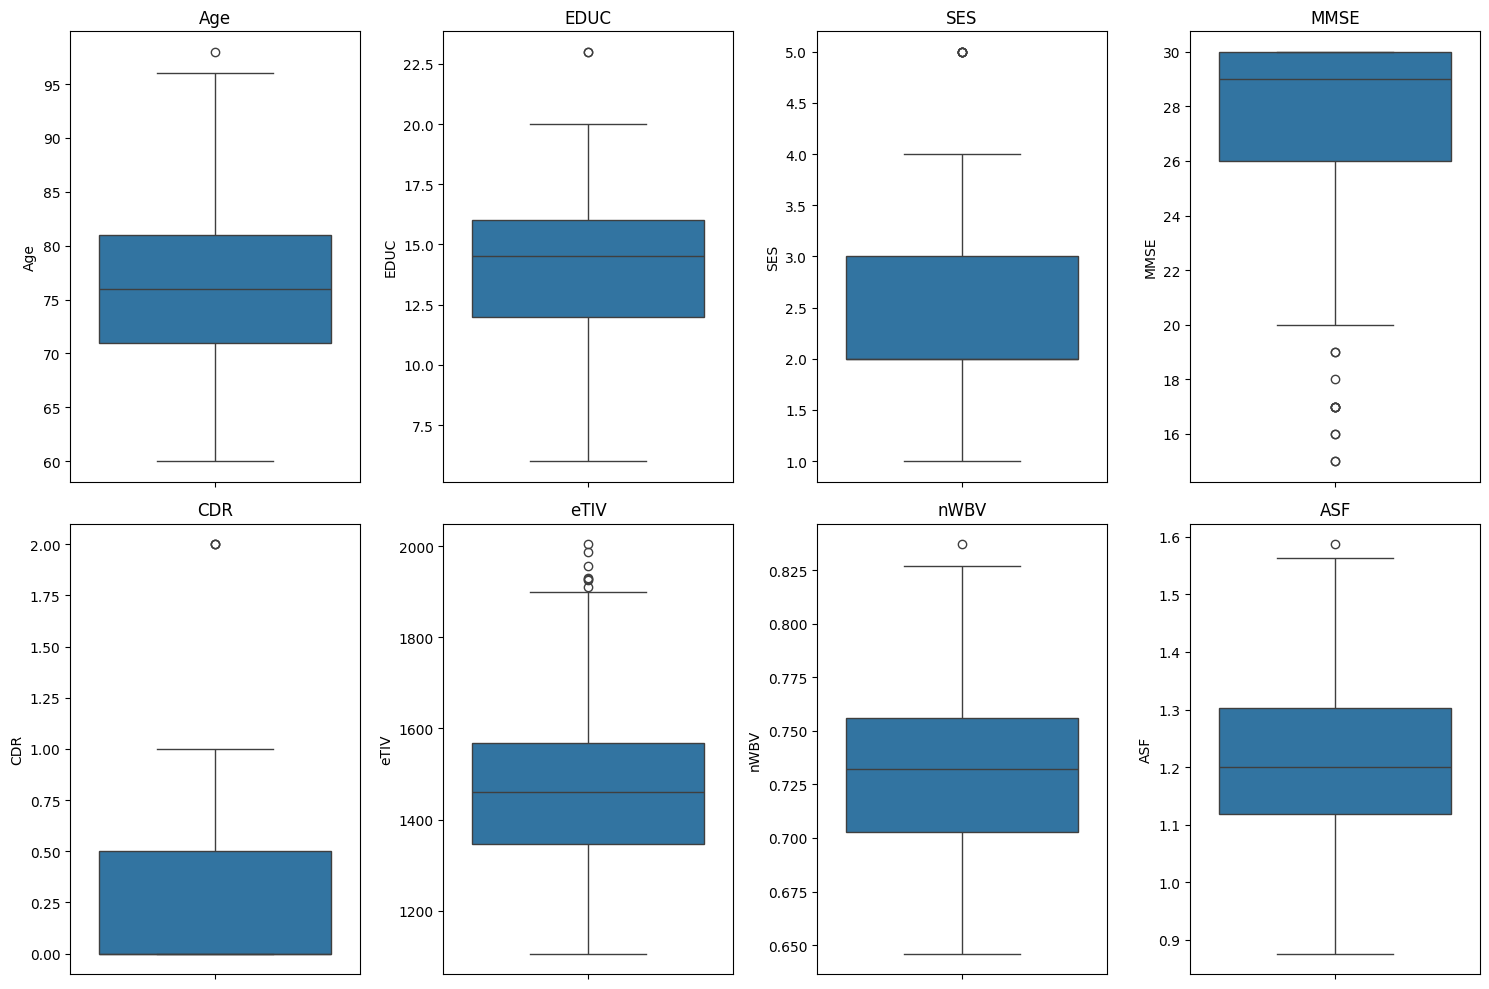

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [27]:
# Preliminary Data Cleaning
# Dropping the 'Unnamed: 0' column as it appears to be an index
df_cleaned = df.drop(columns=['Unnamed: 0'])

# Checking for null values
null_values = df_cleaned.isnull().sum()

# Outlier Examination with Box Plots for continuous variables
continuous_vars = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_cleaned[var])
    plt.title(var)

plt.tight_layout()
plt.show()

null_values

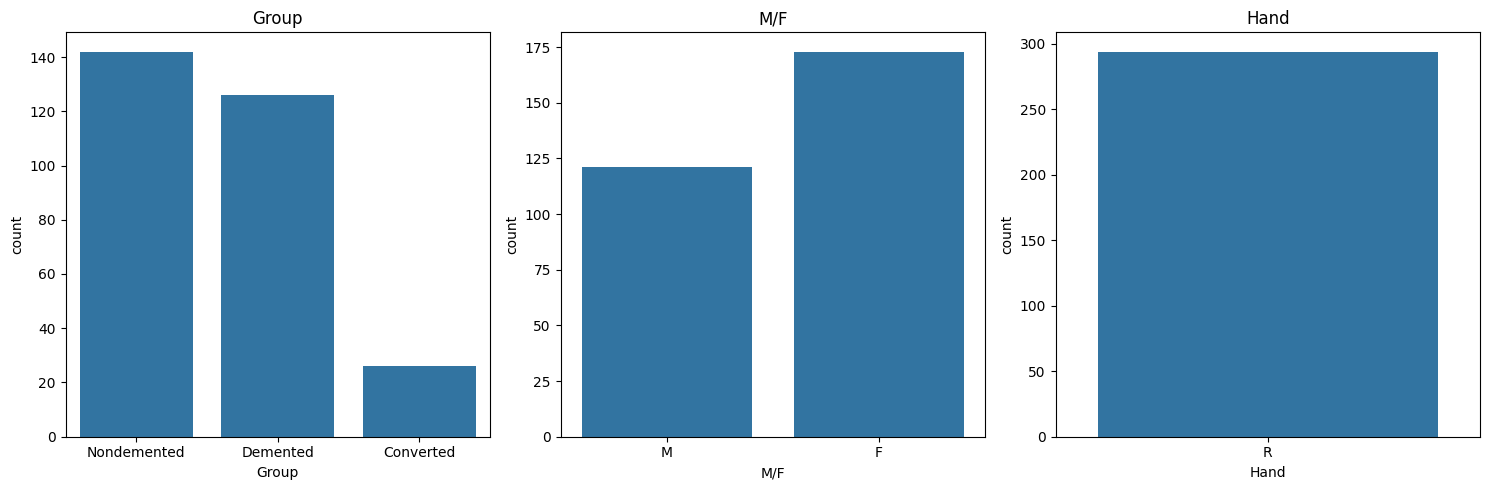

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [28]:
from sklearn.impute import SimpleImputer
# Handling missing values using median imputation
imputer = SimpleImputer(strategy='median')
df_cleaned[['SES', 'MMSE']] = imputer.fit_transform(df_cleaned[['SES', 'MMSE']])

# Rechecking for null values after imputation
null_values_after = df_cleaned.isnull().sum()

# Examining the distribution of categorical variables
categorical_vars = ['Group', 'M/F', 'Hand']

plt.figure(figsize=(15, 5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df_cleaned[var])
    plt.title(var)

plt.tight_layout()
plt.show()

null_values_after

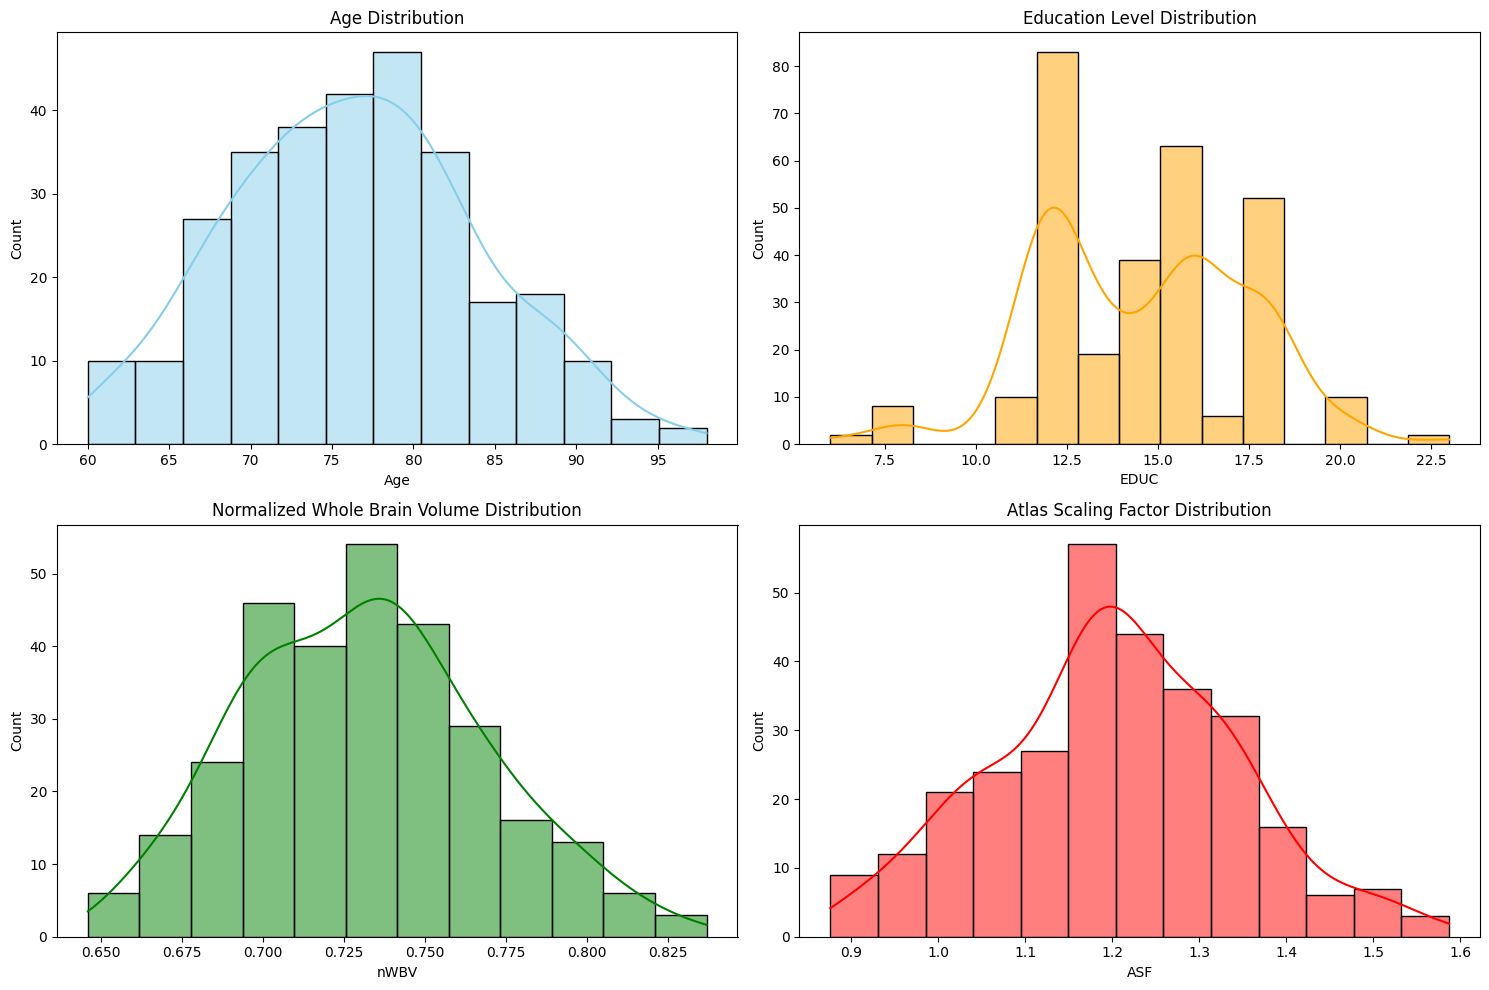

In [29]:
# Distribution plots for continuous variables of interest
plt.figure(figsize=(15, 10))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

# EDUC Distribution
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['EDUC'], kde=True, color='orange')
plt.title('Education Level Distribution')

# nWBV Distribution
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['nWBV'], kde=True, color='green')
plt.title('Normalized Whole Brain Volume Distribution')

# ASF Distribution
plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['ASF'], kde=True, color='red')
plt.title('Atlas Scaling Factor Distribution')

plt.tight_layout()
plt.show()

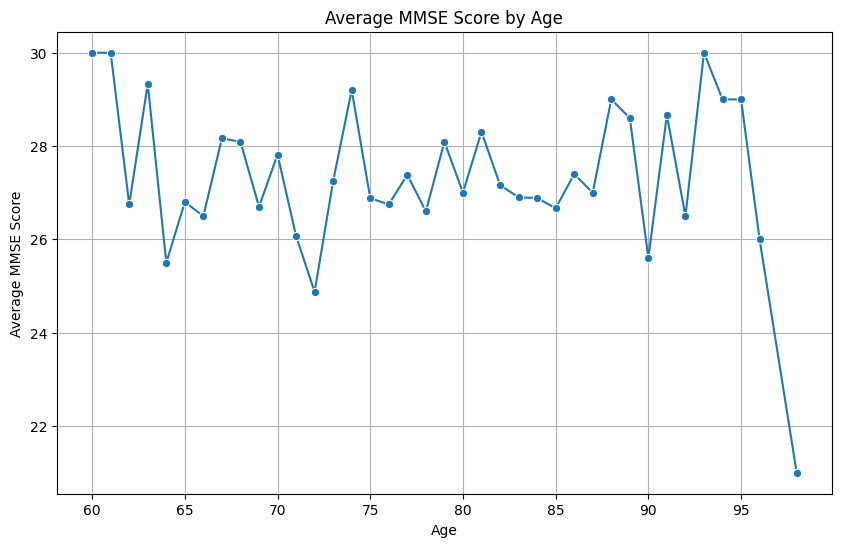

In [30]:
# Line chart for MMSE scores across different ages
mmse_age_mean = df_cleaned.groupby('Age')['MMSE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mmse_age_mean, x='Age', y='MMSE', marker='o')
plt.title('Average MMSE Score by Age')
plt.xlabel('Age')
plt.ylabel('Average MMSE Score')
plt.grid(True)
plt.show()

/var/folders/wn/_1pd5xy132v6z9ynwb5r94540000gn/T/ipykernel_43201/4120262405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cdr_group_mean, x='Group', y='CDR', palette='Set2')


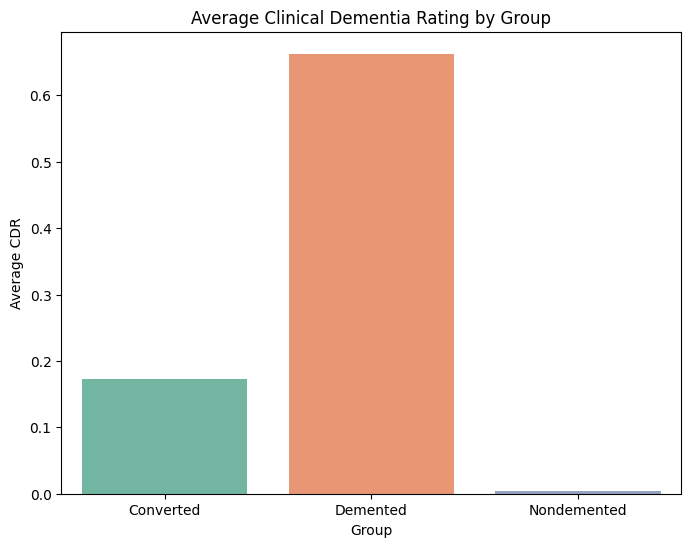

In [31]:
# Bar chart for average CDR by Group
cdr_group_mean = df_cleaned.groupby('Group')['CDR'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=cdr_group_mean, x='Group', y='CDR', palette='Set2')
plt.title('Average Clinical Dementia Rating by Group')
plt.xlabel('Group')
plt.ylabel('Average CDR')
plt.show()

In [35]:
from statsmodels.formula.api import mixedlm
# This setup aims to explore how demographic factors, SES, and MRI measures might influence cognitive health outcomes.

# Transform 'Group' into a categorical variable for analysis
df_cleaned['Group'] = pd.Categorical(df_cleaned['Group'])
df_cleaned['SubjectID'] = pd.Categorical(df_cleaned['Subject ID'])  # For random effects

# Mixed Effects Model
model = mixedlm("CDR ~ Age + EDUC + SES + eTIV + nWBV + Group", df_cleaned, groups=df_cleaned["SubjectID"])
result = model.fit()

# Displaying the results
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM    Dependent Variable:    CDR    
No. Observations:     294        Method:                REML   
No. Groups:           150        Scale:                 0.0290 
Min. group size:      1          Log-Likelihood:        23.8412
Max. group size:      2          Converged:             Yes    
Mean group size:      2.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.886    0.559  1.586 0.113 -0.209  1.981
Group[T.Demented]     0.486    0.055  8.869 0.000  0.378  0.593
Group[T.Nondemented] -0.156    0.053 -2.939 0.003 -0.261 -0.052
Age                  -0.000    0.002 -0.169 0.865 -0.005  0.004
EDUC                  0.007    0.007  0.912 0.362 -0.008  0.021
SES                   0.000    0.019  0.013 0.990 -0.036  0.037
eTIV                  0.000    0.000  0.271 0.787 -0.000  0.000
nWBV                 -1.120    0.500 -2.242 0.025 -2.099 -0.141
Group Var             0.016    0.030                           
===============================================================

"""

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Converted    Demented   0.4896    0.0  0.3818  0.5974   True
Converted Nondemented  -0.1696 0.0006 -0.2763 -0.0628   True
 Demented Nondemented  -0.6592    0.0 -0.7204 -0.5979   True
------------------------------------------------------------


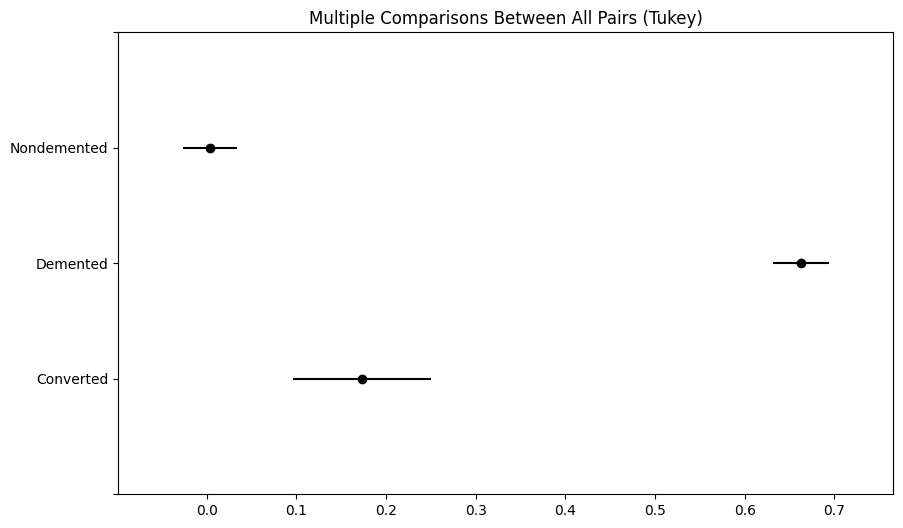

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Preparing data for post-hoc analysis: focusing on 'Group' and 'CDR' for pairwise comparisons
posthoc_data = df_cleaned[['Group', 'CDR']]

# Conducting the Tukey HSD (Honestly Significant Difference) test for pairwise comparison
tukey_result = pairwise_tukeyhsd(endog=posthoc_data['CDR'], groups=posthoc_data['Group'], alpha=0.05)

# Displaying the results
print(tukey_result)

# Plotting the results
tukey_result.plot_simultaneous()
plt.show()

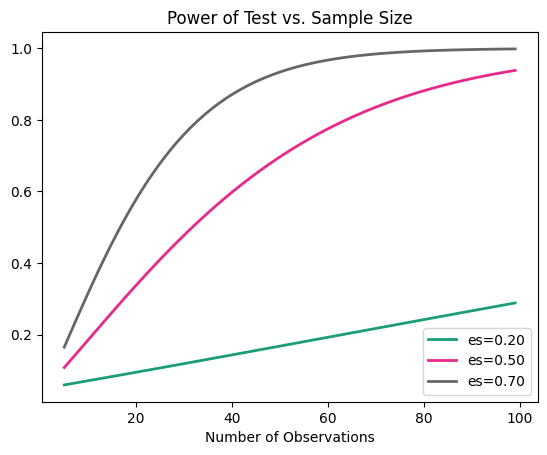

45.45073088568012

In [34]:
from statsmodels.stats.power import TTestIndPower

# Parameters for the power analysis
effect_size = 0.7  # large effect size
alpha = 0.05  # significance level
power = 0.91  # desired power

# Create power analysis object
analysis = TTestIndPower()

# Calculate sample size
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)

# Generate and plot the power analysis
fig = analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(5, 100),
                          effect_size=np.array([0.2, 0.5, 0.7]),
                          alpha=alpha)
plt.title('Power of Test vs. Sample Size')
plt.show()

sample_size